# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2  AC 209 : Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.

Names of people you have worked with goes here: 

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<hr style="height:2pt">


<div class='theme'>Linear Algebra, Accuracy, and Confidence Intervals </div>
In this part of the homework, you will see how _uncertainty_ in the beta coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. You will explore a linear-algebra formula that tells us how accurately we've learned the beta parameters, going beyond simple SEs to describe the joint distribution of the betas. You'll see that the structure of the $X$ data can strongly impact how well we can learn the betas, and you'll determine desirable prroperties of the $X$ data.

The data for this supplement are the same as in lab1, and are imported for you in the cells below.

In [53]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data/cleaned_mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [87]:
y = df[['mpg']].values
X = df[['cyl','disp','hp','wt','qsec']]


X = sm.add_constant(X)


---- 


<div class='exercise'> <b> Question 5 [4 pts] </b> </div>

**5.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our prediction at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The regression line.
 3. The upper and lower bounds of the 95% confidence interval for the _predicted_ (not the observed) `mpg` at any given displacement.
 
**5.2** Why do we have a confidence interval for our predicted value? Why isn't the prediction just a single number?

**5.3** Someone asks what `mpg` you would predict for a `disp` value of 400. What do you tell them? paying attention to the confidence interval (5.1.3) above?

**5.4** Why does the 95% confidence interval for the predicted `mpg` appear to curve as we move away from the data's center? 

### Answers

**5.1 Fit a linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our prediction at various levels of `disp` and make a well-labled plot showing**
 1. **The observed values of weight and mpg**
 2. **The regression line**
 3. **The upper and lower bounds of the 95% confidence interval for the _mean/predicted mpg_ at any given displacement**
 

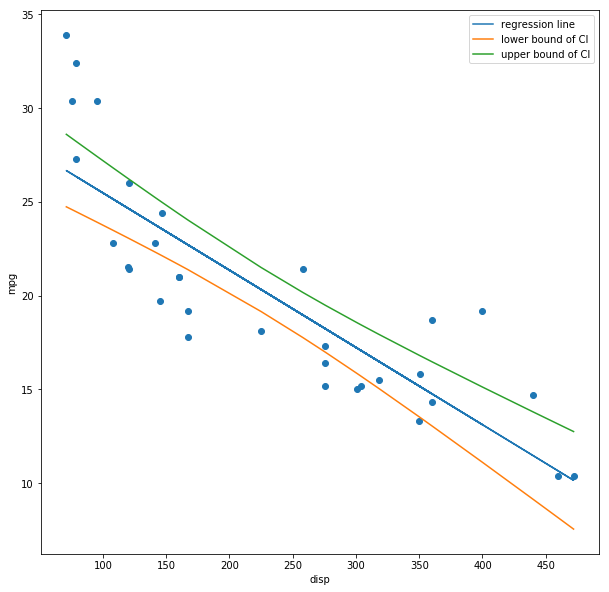

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
1,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
2,25.148622,0.815316,23.483523,26.813720,18.302683,31.994561
3,18.966354,0.588977,17.763503,20.169205,12.217933,25.714774
4,14.762412,0.837509,13.051990,16.472833,7.905308,21.619515
5,20.326453,0.575413,19.151302,21.501604,13.582915,27.069991
6,14.762412,0.837509,13.051990,16.472833,7.905308,21.619515
7,23.553597,0.697931,22.128231,24.978963,16.761985,30.345209
8,23.796766,0.714068,22.338445,25.255087,16.998161,30.595371
9,22.692201,0.647172,21.370498,24.013903,15.921586,29.462815


In [55]:
# your code here 
# your code here
X_disp = sm.add_constant(X['disp'])
FittedOLS = OLS(y, X_disp).fit()
df_summary = FittedOLS.get_prediction().summary_frame()

fig = plt.figure(figsize=(10, 10))
plt.scatter(X['disp'], y)
plt.plot(X['disp'], df_summary['mean'], label='regression line')
X_disp_order = np.argsort(X['disp'])
plt.plot(X['disp'][X_disp_order], df_summary['mean_ci_lower'][X_disp_order], label='lower bound of CI')
plt.plot(X['disp'][X_disp_order], df_summary['mean_ci_upper'][X_disp_order], label='upper bound of CI')
plt.xlabel('disp')
plt.ylabel('mpg')
plt.legend()
plt.show()
df_summary

**5.2 Why do we have a confidience interval for our predicted value? Why isn't the prediction just a single number?**

*your answer here*


**5.3 Someone asks what `mpg` you would predict for a `disp` value of 400. What do you tell them, paying attention to the confidence interval (5.2.3) above?**

In [56]:
# your code here
FittedOLS.get_prediction([1, 400]).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,13.113807,0.983136,11.105976,15.121638,6.176537,20.051077


*your answer here*


**5.4 Why does the 95% confidence interval for the predicted `mpg` appear to curve as we move away from the data's center?**

*your answer here*


<div class='exercise'><b> Question 6 [8 pts] </b></div>
Hopefully, in the question above you recognized that uncertainty in the beta coefficients could impact the certainty of our predictions. In this question and the next, we're going to explore properties of the data that can make us more or less certain of the values of the betas.

**6.1** Fit a multiple linear regression to the full X matrix (on the car data). That is, predict `mpg` using `cyl`,`disp`,`hp`,`wt`, and `qsec`.

**6.2** The formula for the covariance of the vector of betas, assuming the linear regression model holds, is:
$${\rm Cov}(\beta) = \sigma^2\left(X^TX\right)^{-1}.$$
Compute and display this matrix for the car data. 

**6.3** Verify that the SE reported by statsmodels matches the square root of the variance listed for that variable in your calculated covariance matrix.

**6.4** Interpret the matrix formula above. At a minimum, discuss what affects our ability to estimate the betas accurately. When would you expect two betas to have large/small covariances? [This is intended as an open-ended question. You will be graded only on the specified minimum].

**Hint**: we don't know $\sigma^2$, but we can estimate them.<BR>
**Hint**: remember that numpy's normal distribution expects a standard deviation and not a variance.

### Answers

**6.1 Fit a multiple linear regression to the full X matrix (on the car data). That is, predict `mpg` using `cyl`,`disp`,`hp`,`wt`, and `qsec`.**

In [57]:
# your code here
X = sm.add_constant(X)
multiple_ols = OLS(y, X).fit()


**6.2 The formula for the covariance of the vector of betas, assuming the linear regression model holds, is:
$${\rm Cov}(\beta) = \sigma^2\left(X^TX\right)^{-1}.$$
Compute and display this matrix for the car data. **

In [85]:
# your code here
X = np.matrix(X)
n = len(y)
p = X.shape[1]
sig_sq = np.sum(np.square(y - multiple_ols.predict(X).reshape(-1,1)))/(n - p)
Cov = sig_sq * (X.T * X).I
pd.DataFrame(Cov)

,0,1,2,3,4,5
0,98.368517,-3.780794,0.018899,-0.083821,4.959981,-4.638669
1,-3.780794,0.511577,-0.004108,-0.001251,-0.169858,0.128479
2,0.018899,-0.004108,0.000142,-0.000024,-0.008850,0.000328
3,-0.083821,-0.001251,-0.000024,0.000233,-0.004826,0.004399
4,4.959981,-0.169858,-0.008850,-0.004826,1.568470,-0.347664
5,-4.638669,0.128479,0.000328,0.004399,-0.347664,0.237618


**6.3 Verify that the SE reported by statsmodels matches the square root of the variance listed for that variable in your calculated covariance matrix.**

In [76]:
# your code here
multiple_ols.cov_params()

,const,cyl,disp,hp,wt,qsec
const,98.368517,-3.780794,0.018899,-0.083821,4.959981,-4.638669
cyl,-3.780794,0.511577,-0.004108,-0.001251,-0.169858,0.128479
disp,0.018899,-0.004108,0.000142,-0.000024,-0.008850,0.000328
hp,-0.083821,-0.001251,-0.000024,0.000233,-0.004826,0.004399
wt,4.959981,-0.169858,-0.008850,-0.004826,1.568470,-0.347664
qsec,-4.638669,0.128479,0.000328,0.004399,-0.347664,0.237618


*your answer here*


**6.4 Interpret the matrix formula above. At a minimum, discuss what affects our ability to accurately estimate the betas. When would you expect two betas to have large/small covariances? [This is intended as an open-ended question. You will only be graded on the specified minimum].**

*your answer here*

The accuracy of our beta estimates depends on the matrix X. The betas might have large covariances if the data set contains collinearality, which indicates that two or more predictor variables are closely related to each other. The reason for why collinearality will reduce the accuracy of the estimates of the regression coefficients is that it is difficult to determine how differently these linearly related predictor variables impact the response variable.

<div class='exercise'> <b> Question 7 [12 pts]: What affects our knowledge of the betas? </b></div> 


**7.1** Create a separate dataset `edit1` with a new column `noise` that is totally independent of the other columns (random values from an exponential distribution). What effects do you see on our ability to estimate the betas?

**7.2** Create a separate dataset `edit2` with a new column `ratio` that is the ratio of a car's horsepower to its weight. What change do you see in our certainty about weight's effect on mpg?

**7.3** Create a separate dataset `edit3` with a new column `combo` that is horsepower+displacement+weight+ Normal(0,.01) noise. How well can we estimate the betas for this dataset, and which ones are correlated?

**7.4** If you could choose the different features in your data (either because you're running a lab experiment manipulating the X values, or by deciding which columns to measure/keep), how would you like your features to relate? Specifically, how can you get as good an estimate of the betas as possible?

**Hint**: Should introducing pure noise give us meaningfully more accurate beta values? <br>
**Hint**: What happens if $X^TX$ is diagonal?

### Answers

**7.1  Create a separate dataset `edit1` with a new column `noise` that is totally independent of the other columns (random values from an exponential distribution) ... **

In [10]:
# your code here


**7.2 Create a separate dataset `edit2` with a new column `ratio` that is the ratio of a car's horsepower to its weight ... **

In [11]:
# your code here


**7.3 Create a separate dataset `edit3` with a new column `combo` that is horsepower+displacement+weight+ Normal(0,.01) noise... **

In [12]:
# your code here


**7.4 If you could choose the different features in your data (either because you're running a lab experiment manipulating the X values, ... **

*your answer here*
